In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format

# 1 - Clustering

In [84]:
df = pd.read_csv('Clustering\segmentation data.csv')

In [85]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [86]:
df.count()

CustomerID                200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

In [87]:
# df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [88]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Conversão de dados categóricos
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [89]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [90]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [91]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00,200.00
mean,100.50,0.44,38.85,60.56,50.20
std,57.88,0.50,13.97,26.26,25.82
min,1.00,0.00,18.00,15.00,1.00
25%,50.75,0.00,28.75,41.50,34.75
50%,100.50,0.00,36.00,61.50,50.00
75%,150.25,1.00,49.00,78.00,73.00
max,200.00,1.00,70.00,137.00,99.00


<Figure size 1152x720 with 0 Axes>

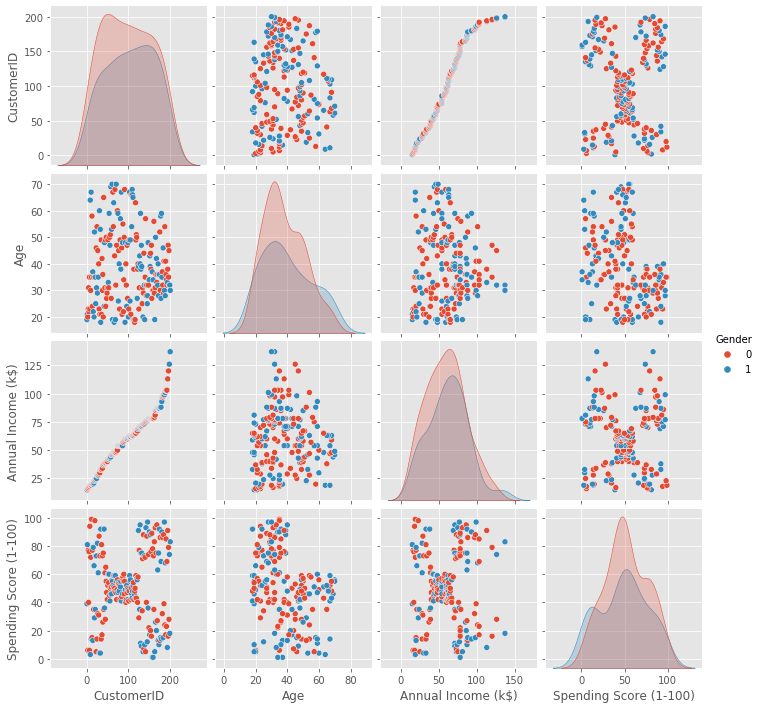

In [92]:
plt.figure(1, figsize=(16,10))
sns.pairplot(data=df, hue='Gender')
plt.show()

In [93]:
# Seleção das colunas relevantes para clustering
df_cluster = df[['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']]
df_cluster.head()

,Age,Gender,Annual Income (k$),Spending Score (1-100)
0,19,1,15,39
1,21,1,15,81
2,20,0,16,6
3,23,0,16,77
4,31,0,17,40


In [94]:
# Normalização dos dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

## K-means

[799.9999999999999, 588.8026767824937, 476.7875544135159, 386.7147857740688, 325.10998348953444, 275.8588431130499, 236.2049470708688, 199.7166255966767, 174.19309570857692, 152.08676298710697]


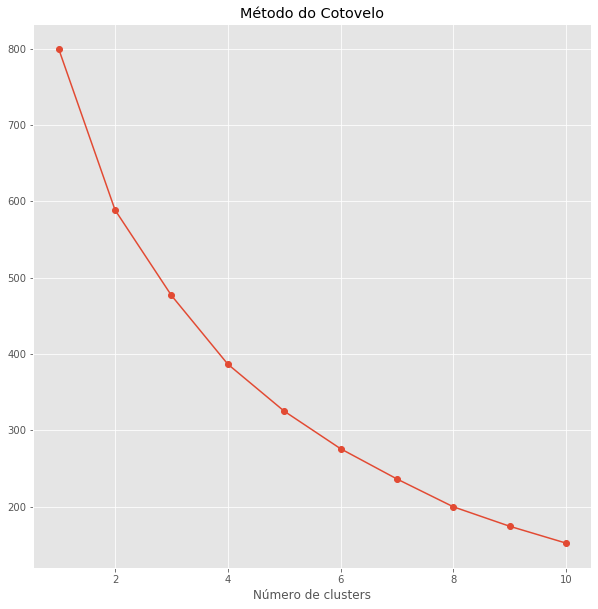

In [97]:
# Método do Cotovelo para determinar o número de clusters
lista = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    lista.append(kmeans.inertia_)

print(lista)

plt.plot(range(1, 11), lista, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.show()

Analisando o grafico, parece que o cotovelo se faz entre os pontos 4 e 5, antes de começar uma reta novamente, dessa forma, acredito que o número de cluster seja 5

In [98]:
n_clusters = 5

In [99]:
model_knn = KMeans(n_clusters, random_state=42)
clusters_kmeans = model_knn.fit_predict(df_scaled)
df['Cluster_KNN'] = clusters_kmeans

In [100]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_KNN
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,2
3,4,0,23,16,77,0
4,5,0,31,17,40,2


Perfis de Clientes

In [101]:
X = df

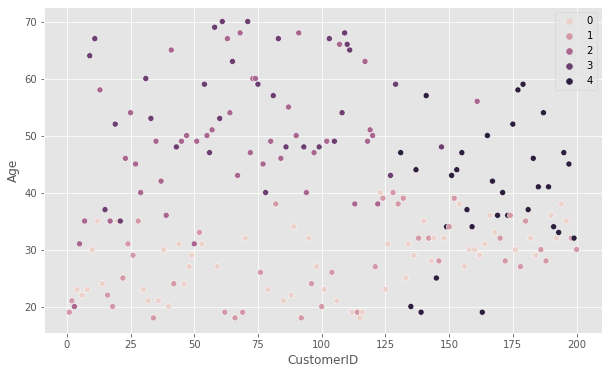

In [110]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 2], hue=model_knn.labels_)
plt.show()

In [111]:
df['label'] = model_knn.labels_

In [114]:
for i in range(5):
    print(f'Cluster : {i}')
    print(df[df.label == i].describe().iloc[[0, 1, 3, 7], :-1])
    print('\n\n')

Cluster : 0
       CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)  \
count       55.00   55.00 55.00               55.00                   55.00   
mean       102.85    0.00 28.35               60.80                   68.65   
min          4.00    0.00 18.00               16.00                   29.00   
max        196.00    0.00 40.00              120.00                   99.00   

       Cluster_KNN  
count        55.00  
mean          0.00  
min           0.00  
max           0.00  



Cluster : 1
       CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)  \
count       40.00   40.00 40.00               40.00                   40.00   
mean       103.38    1.00 28.25               62.00                   71.67   
min          1.00    1.00 18.00               15.00                   39.00   
max        200.00    1.00 40.00              137.00                   97.00   

       Cluster_KNN  
count        40.00  
mean          1.00  
min          

## DBSCAN

In [116]:
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN
model_dbscan = DBSCAN(eps=0.5, min_samples=n_clusters)
clusters_dbscan = model_dbscan.fit_predict(df_scaled)
df['Cluster_DBSCAN'] = clusters_dbscan

In [117]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_KNN,label,Cluster_DBSCAN
0,1,1,19,15,39,1,1,-1
1,2,1,21,15,81,1,1,-1
2,3,0,20,16,6,2,2,-1
3,4,0,23,16,77,0,0,0
4,5,0,31,17,40,2,2,-1


## Agglomerative Clustering

In [118]:
from sklearn.cluster import AgglomerativeClustering

# Aplicar Agglomerative Clustering
model_agglo = AgglomerativeClustering(n_clusters=n_clusters)
clusters_agglo = model_agglo.fit_predict(df_scaled)
df['Cluster_Agglo'] = clusters_agglo

In [119]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_KNN,label,Cluster_DBSCAN,Cluster_Agglo
0,1,1,19,15,39,1,1,-1,0
1,2,1,21,15,81,1,1,-1,0
2,3,0,20,16,6,2,2,-1,3
3,4,0,23,16,77,0,0,0,0
4,5,0,31,17,40,2,2,-1,3


## Principais características dos clientes segmentados?

In [122]:
# Análise descritiva dos clusters
def cluster_analysis(data, cluster_label):
    clusters = data.groupby(cluster_label).mean()
    counts = data[cluster_label].value_counts()
    return clusters, counts

# K-Means
clusters_kmeans, counts_kmeans = cluster_analysis(df, 'Cluster_KNN')
print("K-Means Clusters:\n", clusters_kmeans)
print("\nCluster Counts:\n", counts_kmeans)

# DBSCAN
clusters_dbscan, counts_dbscan = cluster_analysis(df, 'Cluster_DBSCAN')
print("\nDBSCAN Clusters:\n", clusters_dbscan)
print("\nCluster Counts:\n", counts_dbscan)

# Agglomerative Clustering
clusters_agglo, counts_agglo = cluster_analysis(df, 'Cluster_Agglo')
print("\nAgglomerative Clustering Clusters:\n", clusters_agglo)
print("\nCluster Counts:\n", counts_agglo)


K-Means Clusters:
              CustomerID  Gender   Age  Annual Income (k$)  \
Cluster_KNN                                                 
0                102.85    0.00 28.35               60.80   
1                103.38    1.00 28.25               62.00   
2                 66.65    0.00 48.72               46.19   
3                 72.61    1.00 55.90               48.77   
4                167.45    0.55 40.42               90.00   

             Spending Score (1-100)  label  Cluster_DBSCAN  Cluster_Agglo  
Cluster_KNN                                                                
0                             68.65   0.00            2.80           0.38  
1                             71.67   1.00            1.65           0.55  
2                             39.67   2.00            0.35           2.70  
3                             38.81   3.00            2.32           3.68  
4                             15.74   4.00           -1.00           2.00  

Cluster Counts:
 0  

## Número de perfis de clientes segmentados?

Analisando o resultado de cada cluster:

**K-Means**: Identificou 5 clusters

**DBSCAN**: Identificou vários clusters e parece ter um outlier pelo resultado de -1. Pode ser nao ser considerado para esses dados um bom modelo

**Agglomerative Clustering**: Tambem Identificou 5 clusters

## Perfil dos clientes maioritários e minoritários / qual o perfil mais dominante e menos dominante?

**K-Means:**

Cluster Dominante: Cluster 0 (55 clientes)

Cluster Menos Dominante: Clusters 3 e 4 (31 clientes cada)

**Agglomerative Clustering:**

Cluster Dominante: Cluster 0 (61 clientes)

Cluster Menos Dominante: Cluster 4 (29 clientes)

**DBSCAN:**

Cluster Dominante: Cluster -1 (Outlier, 105 clientes)

Cluster Menos Dominante: Cluster 6 (4 clientes)

## Existem clusters bem separados ou onde a sua diferenciação não é tão clara?

**K-Means**: Parace ter uma definição clara, são 5 clusters

**Agglomerative Clustering**: Também parecer ter uma definição clara, parecido com o modelo K-Means, 5 clusters

**DBSCAN**: Parece ter outliers e uma separação de clusters muito diferente dos outros dois modelos, não sendo tão clara

# 2 - Collaborative Filtering

In [2]:
df_items = pd.read_csv('CF/items.csv')
df_ratings = pd.read_csv('CF/ratings.csv')

In [3]:
df_items.head()

,jokeId,jokeText
0,1,"A man visits the doctor. The doctor says ""I ha..."
1,2,This couple had an excellent relationship goin...
2,3,Q. What's 200 feet long and has 4 teeth? \n\nA...
3,4,Q. What's the difference between a man and a t...
4,5,Q.\tWhat's O. J. Simpson's Internet address? \...


In [4]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   jokeId    150 non-null    int64 
 1   jokeText  150 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [5]:
df_ratings.head()

,userId,jokeId,rating
0,1,5,0.22
1,1,7,-9.28
2,1,8,-9.28
3,1,13,-6.78
4,1,15,0.88


In [6]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761439 entries, 0 to 1761438
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   userId  int64  
 1   jokeId  int64  
 2   rating  float64
dtypes: float64(1), int64(2)
memory usage: 40.3 MB


In [7]:
df_ratings.isna().sum()

userId    0
jokeId    0
rating    0
dtype: int64

In [8]:
df_ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
userId,"1,761,439.00","32,723.22","18,280.11",1.00,"17,202.00","34,808.00","47,306.00","63,978.00"
jokeId,"1,761,439.00",70.71,46.01,5.00,21.00,69.00,112.00,150.00
rating,"1,761,439.00",1.62,5.30,-10.00,-2.03,2.22,5.72,10.00


## Perfil das notas

In [9]:
# Perfil 1: Prefere anedotas com classificações positivas altas (7 a 10)
perfil_1 = df_ratings[df_ratings['rating'] >= 7]['userId'].mode()[0]

# Perfil 2: Prefere anedotas com classificações mistas (tanto positivas quanto negativas)
perfil_2 = df_ratings[(df_ratings['rating'] >= -3) & (df_ratings['rating'] <= 3)]['userId'].mode()[0]

# Perfil 3: Prefere anedotas com classificações negativas (-10 a -7)
perfil_3 = df_ratings[df_ratings['rating'] <= -7]['userId'].mode()[0]


In [10]:
perfil_1, perfil_2, perfil_3

(6112, 14060, 937)

## Matrizes

In [24]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# preparaçao dos dados para a biblioteca Surprise
# Usado -10 e 10 pois são os menores e maiores valores do ratings
reader = Reader(rating_scale=(-10, 10))
data = Dataset.load_from_df(df_ratings[['userId', 'jokeId', 'rating']], reader)

# Dividir os dados em conjunto de treino e teste
trainset, testset = train_test_split(data, test_size=0.25)

# Treinamento do modelo SVD
algo = SVD()
algo.fit(trainset)

# Avaliação do modelo
predictions = algo.test(testset)
accuracy.rmse(predictions)


RMSE: 4.4727


4.472739482808577

## Melhorar o algoritmo

In [26]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate, GridSearchCV

# carregar os dados
reader = Reader(rating_scale=(-10, 10))
data = Dataset.load_from_df(df_ratings[['userId', 'jokeId', 'rating']], reader)

# definir os parâmetros para o GridSearch
param_grid = {
    'n_factors': [20, 50, 100],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.05, 0.1]
}

# realizar o GridSearchCV
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5, n_jobs=-1)
gs.fit(data)

print("Melhores parâmetros:", gs.best_params['rmse'])
print("Melhor RMSE:", gs.best_score['rmse'])


Melhores parâmetros: {'n_factors': 100, 'lr_all': 0.002, 'reg_all': 0.1}
Melhor RMSE: 4.180652486736852


In [27]:
# treinamento do modelo SVD com os melhores hiperparâmetros
best_svd = gs.best_estimator['rmse']
trainset = data.build_full_trainset()
best_svd.fit(trainset)

# prever as classificaçoes e calcular o RMSE no conjunto de testes
testset = trainset.build_testset()
predictions = best_svd.test(testset)
accuracy.rmse(predictions)

RMSE: 2.6514


2.65135675074498

## Gerar Recomendações

In [28]:
def df_top_recomendacoes(perfil, top=5):
    # listar todas as anedotas unicas
    all_jokes = df_ratings['jokeId'].unique()
    
    # listar as anedotas que nao foram avaliadas
    user_ratings = df_ratings[df_ratings['userId'] == perfil]
    user_jokes = user_ratings['jokeId'].unique()
    jokes_to_predict = [joke for joke in all_jokes if joke not in user_jokes]
    
    # prever as anedotas nao avaliadas
    predictions = [best_svd.predict(perfil, joke_id) for joke_id in jokes_to_predict]
    
    # listar as top 5 por perfil
    top_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:top]
    
    # retornar as recomendaçoes
    top_jokes = [(pred.iid, pred.est) for pred in top_predictions]
    return top_jokes

# gerar recomendaçoes para os perfils
recomendacoes_perfil1 = df_top_recomendacoes(perfil_1)
recomendacoes_perfil2 = df_top_recomendacoes(perfil_2)
recomendacoes_perfil3 = df_top_recomendacoes(perfil_3)


In [29]:
print('Perfil 1')
recomendacoes_perfil1

Perfil 1


[(61, 10), (43, 10), (73, 10), (80, 9.59122005601564), (31, 9.398489122554555)]

In [30]:
print('Perfil 2')
recomendacoes_perfil2

Perfil 2


[(73, 0.9123882966706711),
 (27, 0.8322626369118387),
 (100, 0.6186530105091651),
 (43, 0.555818072863252),
 (116, 0.2922909246378578)]

In [31]:
print('Perfil 3')
recomendacoes_perfil3

Perfil 3


[(5, -6.230060865331216),
 (100, -7.049231688685669),
 (52, -7.779802406976842),
 (20, -8.172401280942681),
 (27, -8.259764733775697)]

## Mostras as Recomendações

In [32]:
def df_link_recomendacoes_itens(recomendacoes):
    lista_jokes = []
    for joke_id, rating in recomendacoes:
        joke_text = df_items[df_items['jokeId'] == joke_id]['jokeText'].values[0]
        lista_jokes.append((joke_id, joke_text, rating))
    return lista_jokes

# Mapear e exibir as anedotas recomendadas
item_recomendacoes_perfil1 = df_link_recomendacoes_itens(recomendacoes_perfil1)
item_recomendacoes_perfil2 = df_link_recomendacoes_itens(recomendacoes_perfil2)
item_recomendacoes_perfil3 = df_link_recomendacoes_itens(recomendacoes_perfil3)

In [33]:
print('Perfil 1:')
item_recomendacoes_perfil1

Perfil 1:


[(61,
  'During a recent publicity outing, Hillary sneaked off to visit a\nfortune teller of some local repute.  In a dark and hazy room, peering\ninto a crystal ball, the mystic delivered grave news.\n"There\'s no easy way to say this, so I\'ll just be blunt: Prepare\nyourself to be a widow.  Your husband will die a violent and horrible\ndeath this year."\nVisibly shaken, Hillary stared at the woman\'s lined face, then at \nthe single flickering candle, then down at her hands.  She took a few \ndeep breaths to compose herself.  She simply had to know.  She met the\nfortune teller\'s gaze, steadied her voice, and asked her question.\n"Will I be acquitted?"\n',
  10),
 (43,
  'Arnold Swartzeneger and Sylvester Stallone are making a movie about\nthe lives of the great composers.  \nStallone says "I want to be Mozart." \nSwartzeneger says: "In that case...  I\'ll be Bach."\n',
  10),
 (73,
  "Q: What is the difference between George  Washington, Richard Nixon,\nand Bill Clinton?\n\nA: Was

In [34]:
print('Perfil 2:')
item_recomendacoes_perfil2

Perfil 2:


[(73,
  "Q: What is the difference between George  Washington, Richard Nixon,\nand Bill Clinton?\n\nA: Washington couldn't tell a lie, Nixon couldn't   tell the truth, and\nClinton doesn't know the difference.\n",
  0.9123882966706711),
 (27,
  'Clinton returns from a vacation in Arkansas and walks down  the\nsteps of Air Force One with two pigs under his arms.  At the bottom\nof the steps, he says  to the honor guardsman, "These are genuine\nArkansas Razor-Back Hogs.  I got this one for Chelsea and this one for\nHillary."  \n\nThe guardsman replies, "Nice trade, Sir."\n',
  0.8322626369118387),
 (100,
  'Q: Whats the difference between greeting a Queen and greeting the\nPresident of the United  States?\n\nA: You only have to get on one knee to greet the queen.\n',
  0.6186530105091651),
 (43,
  'Arnold Swartzeneger and Sylvester Stallone are making a movie about\nthe lives of the great composers.  \nStallone says "I want to be Mozart." \nSwartzeneger says: "In that case...  I\'ll be B

In [35]:
print('Perfil 3:')
item_recomendacoes_perfil3

Perfil 3:


[(5,
  "Q.\tWhat's O. J. Simpson's Internet address? \nA.\tSlash, slash, backslash, slash, slash, escape.\n",
  -6.230060865331216),
 (100,
  'Q: Whats the difference between greeting a Queen and greeting the\nPresident of the United  States?\n\nA: You only have to get on one knee to greet the queen.\n',
  -7.049231688685669),
 (52,
  'Q: What do Monica Lewinsky and Bob Dole have in common?\nA: They were both upset when Bill finished first.\n',
  -7.779802406976842),
 (20,
  "What's the difference between a MacIntosh and an\nEtch-A-Sketch? \n\nYou don't have to shake the Mac to clear the screen. \n",
  -8.172401280942681),
 (27,
  'Clinton returns from a vacation in Arkansas and walks down  the\nsteps of Air Force One with two pigs under his arms.  At the bottom\nof the steps, he says  to the honor guardsman, "These are genuine\nArkansas Razor-Back Hogs.  I got this one for Chelsea and this one for\nHillary."  \n\nThe guardsman replies, "Nice trade, Sir."\n',
  -8.259764733775697)]

## Conclusão

Foi escolhido a biblioteca *Surprise* para fazer as recomendações, já que é uma biblioteca indicada para sistemas de recomendações

Com a utilização inicial do modelo surprise, tive um RMSE de **4.47**, aplicando testes de hiperparâmetros, consegui um valor de **2.65**, obtendo uma melhora significativa

O trabalho com matrizes, fazendo pesquisas, foi o mais indicado para gerar os perfils e trabalhar com datasets grandes, usando o metodo SVD que permite fazer a avaliação das matrizes entre as anetodas e os itens, além de ser um método com boa precisão



